In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.3 MB/s eta 0:00:00


In [2]:
!pip install qiskit ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.z(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.z(qreg_q[0])
circuit.x(qreg_q[1])
circuit.z(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.z(qreg_q[1])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw()

┌───┐       ░ ┌───┐ ░ ┌───┐ ░         
q_0: ┤ H ├─■─────░─┤ X ├─░─┤ Z ├─░─────────
     ├───┤ │     ░ ├───┤ ░ ├───┤ ░ ┌───┐┌─┐
q_1: ┤ H ├─■──■──░─┤ Z ├─░─┤ X ├─░─┤ Z ├┤M├
     ├───┤    │  ░ └───┘ ░ ├───┤ ░ ├───┤└╥┘
q_2: ┤ H ├────■──░───────░─┤ Z ├─░─┤ X ├─╫─
     └───┘       ░       ░ └───┘ ░ └───┘ ║ 
c: 4/════════════════════════════════════╩═
                                         1

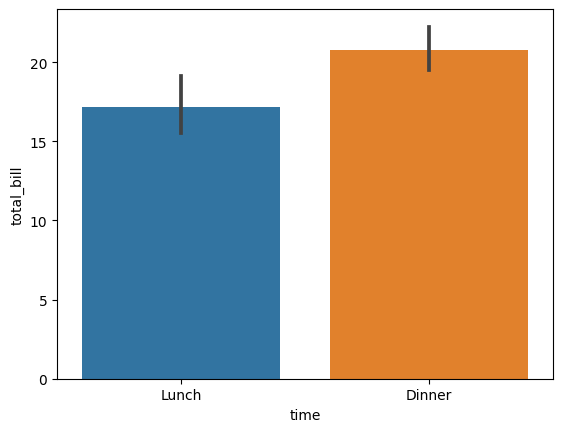

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.barplot(x = 'time',y = 'total_bill',data = df)
plt.show()

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)

qc.draw()

┌───┐          ┌───┐           ░ ┌─┐      
    q_0: ┤ H ├───────■──┤ H ├───────────░─┤M├──────
         ├───┤       │  └───┘┌───┐      ░ └╥┘┌─┐   
    q_1: ┤ H ├───────┼────■──┤ H ├──────░──╫─┤M├───
         ├───┤       │    │  └───┘┌───┐ ░  ║ └╥┘┌─┐
    q_2: ┤ H ├───────┼────┼────■──┤ H ├─░──╫──╫─┤M├
         ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘ ░  ║  ║ └╥┘
ancilla: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─────────╫──╫──╫─
         └───┘└───┘└───┘└───┘└───┘         ║  ║  ║ 
    c: 3/══════════════════════════════════╩══╩══╩═
                                           0  1  2

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[3])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw()

┌───┐          ┌───┐           ░ ┌─┐      
q_0: ┤ H ├───────■──┤ H ├───────────░─┤M├──────
     ├───┤       │  └───┘┌───┐      ░ └╥┘┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├──────░──╫─┤M├───
     ├───┤       │    │  └───┘┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■──┤ H ├─░──╫──╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─────────╫──╫──╫─
     └───┘└───┘└───┘└───┘└───┘         ║  ║  ║ 
c: 3/══════════════════════════════════╩══╩══╩═
                                       0  1  2

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[4])
circuit.t(qreg_q[3])
circuit.h(qreg_q[1])
circuit.t(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.t(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[2])
circuit.t(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.t(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.draw()

┌───┐     ┌───┐                         ┌─┐              
q_0: ┤ H ├──■──┤ T ├─────────────────■───────┤M├──────────────
     └───┘┌─┴─┐├───┤     ┌───┐┌───┐┌─┴─┐┌───┐└╥┘┌─┐           
q_1: ─────┤ X ├┤ H ├──■──┤ T ├┤ H ├┤ X ├┤ H ├─╫─┤M├───────────
          └───┘└───┘┌─┴─┐├───┤└───┘├───┤├───┤ ║ └╥┘┌─┐        
q_2: ───────────────┤ X ├┤ H ├──■──┤ T ├┤ H ├─╫──╫─┤M├────────
     ┌───┐     ┌───┐├───┤└───┘┌─┴─┐├───┤└───┘ ║  ║ └╥┘┌───┐┌─┐
q_3: ┤ H ├──■──┤ T ├┤ H ├─────┤ X ├┤ H ├──■───╫──╫──╫─┤ H ├┤M├
     └───┘┌─┴─┐├───┤├───┤┌───┐└───┘└───┘┌─┴─┐ ║  ║  ║ ├───┤└╥┘
q_4: ─────┤ X ├┤ H ├┤ T ├┤ H ├──────────┤ X ├─╫──╫──╫─┤ H ├─╫─
          └───┘└───┘└───┘└───┘          └───┘ ║  ║  ║ └───┘ ║ 
c: 4/═════════════════════════════════════════╩══╩══╩═══════╩═
                                              0  1  2       3

Scatter plot


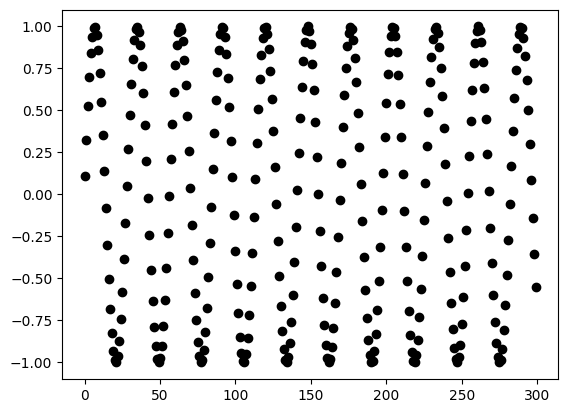

Linear interpolation


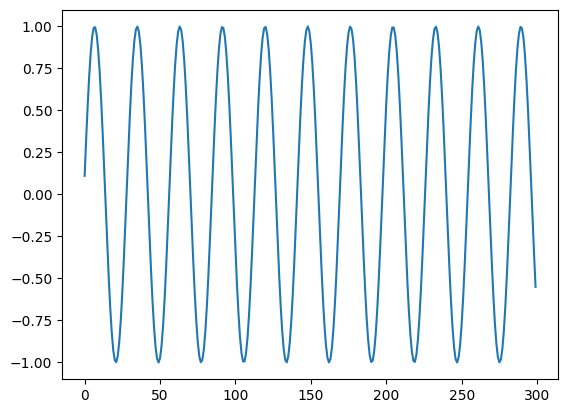

In [ ]:
#Grover's algo analysis: The following code cell illustrates the values we obtain for different choices of theta and t.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

theta = 1/9  # angle in radians

t = np.arange(0,300,1)   # (start, stop, step)
y = np.sin((2*t + 1) * theta)

print("Scatter plot")
plt.plot(t, y, 'o', color='black')
plt.show()

print("Linear interpolation")
plt.plot(t, y)
plt.show()

In [ ]:
#The following code cell provides some sense for the closeness of this approximation for exponentially increasing values of N.
from numpy import arcsin
from math import sqrt

for k in range(1,21):
    N = 2**k
    print("%d\t %12.10f\t %12.10f" % (N, 1/sqrt(N), arcsin(1/sqrt(N))))

2	 0.7071067812	 0.7853981634
4	 0.5000000000	 0.5235987756
8	 0.3535533906	 0.3613671239
16	 0.2500000000	 0.2526802551
32	 0.1767766953	 0.1777106008
64	 0.1250000000	 0.1253278312
128	 0.0883883476	 0.0885038431
256	 0.0625000000	 0.0625407618
512	 0.0441941738	 0.0442085726
1024	 0.0312500000	 0.0312550885
2048	 0.0220970869	 0.0220988856
4096	 0.0156250000	 0.0156256359
8192	 0.0110485435	 0.0110487683
16384	 0.0078125000	 0.0078125795
32768	 0.0055242717	 0.0055242998
65536	 0.0039062500	 0.0039062599
131072	 0.0027621359	 0.0027621394
262144	 0.0019531250	 0.0019531262
524288	 0.0013810679	 0.0013810684
1048576	 0.0009765625	 0.0009765627


In [ ]:
#Here's a code cell that calculates the probability of success for increasing values of n.
from numpy import arcsin, sin
from math import sqrt, pi, floor

print("N\t p(N,1)\n---------------------")
for n in range(1,20):
    N = 2**n
    theta = arcsin(sqrt(1/N))
    t = floor(pi/(4*theta))
    p = sin((2*t+1)*theta)**2
    print("%d\t %12.10f" % (N, p))

N	 p(N,1)
---------------------
2	 0.5000000000
4	 1.0000000000
8	 0.9453125000
16	 0.9613189697
32	 0.9991823155
64	 0.9965856808
128	 0.9956198657
256	 0.9999470421
512	 0.9994480262
1024	 0.9994612447
2048	 0.9999968478
4096	 0.9999453461
8192	 0.9999157752
16384	 0.9999997811
32768	 0.9999868295
65536	 0.9999882596
131072	 0.9999992587
262144	 0.9999978382
524288	 0.9999997279


In [ ]:
from numpy import arcsin, sin
from math import sqrt, pi, floor

# We'll start the loop with n=2 to stay within the domain of arcsin.
# (Note that we can't have 4 solutions when n=1.)

for n in range(2,20):
    N = 2**n
    old_theta = arcsin(sqrt(1/N))
    new_theta = arcsin(sqrt(4/N))
    t = floor(pi/(4*old_theta))
    p = sin((2*t+1)*new_theta)**2
    print("%d\t %12.10f" % (N, p))

4	 1.0000000000
8	 0.5000000000
16	 0.2500000000
32	 0.0122070313
64	 0.0203807689
128	 0.0144530758
256	 0.0000705058
512	 0.0019310741
1024	 0.0023009083
2048	 0.0000077506
4096	 0.0002301502
8192	 0.0003439882
16384	 0.0000007053
32768	 0.0000533810
65536	 0.0000472907
131072	 0.0000030066
262144	 0.0000086824
524288	 0.0000010820


In [ ]:
from numpy import arcsin, sin
from math import sqrt, pi, floor, ceil, log2

s = 7  # Number of solutions. This can be any positive integer.
print("N\t p(N,%d)\n---------------------" % s)

# The loop starts with the smallest value of n that allows s solutions.

for n in range(ceil(log2(s)),ceil(log2(s))+20):
    N = 2**n
    theta = arcsin(sqrt(s/N))
    t = floor(pi/(4*theta))
    p = sin((2*t+1)*theta)**2
    print("%d\t %12.10f" % (N, sin((2*t + 1)*theta)**2))

N	 p(N,7)
---------------------
8	 0.8750000000
16	 0.6835937500
32	 0.9877929688
64	 0.9869401455
128	 0.9933758959
256	 0.9942813445
512	 0.9977678832
1024	 0.9999963373
2048	 0.9999257666
4096	 0.9983374778
8192	 0.9995465664
16384	 0.9995822234
32768	 0.9999531497
65536	 0.9998961946
131072	 0.9999998224
262144	 0.9999745784
524288	 0.9999894829
1048576	 0.9999939313
2097152	 0.9999979874
4194304	 0.9999986243


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[4])
circuit.t(qreg_q[3])
circuit.h(qreg_q[1])
circuit.t(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.t(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[2])
circuit.t(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.t(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.draw()

┌───┐     ┌───┐                         ┌─┐              
q_0: ┤ H ├──■──┤ T ├─────────────────■───────┤M├──────────────
     └───┘┌─┴─┐├───┤     ┌───┐┌───┐┌─┴─┐┌───┐└╥┘┌─┐           
q_1: ─────┤ X ├┤ H ├──■──┤ T ├┤ H ├┤ X ├┤ H ├─╫─┤M├───────────
          └───┘└───┘┌─┴─┐├───┤└───┘├───┤├───┤ ║ └╥┘┌─┐        
q_2: ───────────────┤ X ├┤ H ├──■──┤ T ├┤ H ├─╫──╫─┤M├────────
     ┌───┐     ┌───┐├───┤└───┘┌─┴─┐├───┤└───┘ ║  ║ └╥┘┌───┐┌─┐
q_3: ┤ H ├──■──┤ T ├┤ H ├─────┤ X ├┤ H ├──■───╫──╫──╫─┤ H ├┤M├
     └───┘┌─┴─┐├───┤├───┤┌───┐└───┘└───┘┌─┴─┐ ║  ║  ║ ├───┤└╥┘
q_4: ─────┤ X ├┤ H ├┤ T ├┤ H ├──────────┤ X ├─╫──╫──╫─┤ H ├─╫─
          └───┘└───┘└───┘└───┘          └───┘ ║  ║  ║ └───┘ ║ 
c: 4/═════════════════════════════════════════╩══╩══╩═══════╩═
                                              0  1  2       3

<ipython-input-5-468a882273cf>:29: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


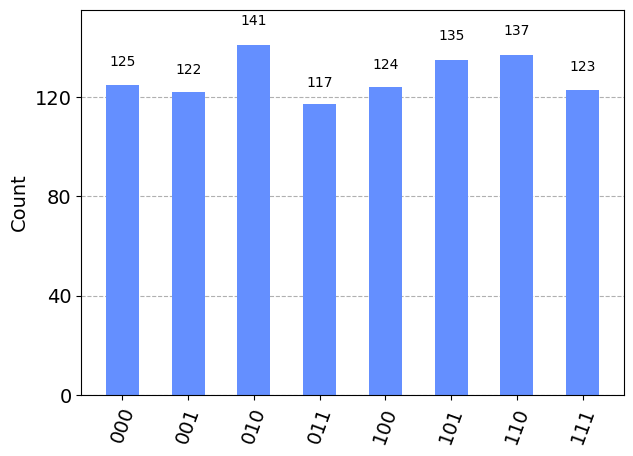

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import pi

# Prepare the quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)

# Apply Hadamard gate to all qubits
qc.h([0,1,2])

# Oracle function for the target state |111⟩
qc.cz(0, 2)
qc.cz(1, 2)

# Apply Hadamard gate again
qc.h([0,1,2])

# Apply the Z-gate and Hadamard gate again
qc.z([0,1,2])
qc.h([0,1,2])

# Measure all qubits
qc.measure([0,1,2], [0,1,2])

# Simulate the quantum circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)

In [4]:
#Shor's algo qiskit implementaiton
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")

    qc = QuantumCircuit(4, name=f"{a} mod 15")

    if a in [2, 13]:
        qc.swap(2, 3)
        qc.swap(1, 2)
        qc.swap(0, 1)
    if a in [7, 8]:
        qc.swap(0, 1)
        qc.swap(1, 2)
        qc.swap(2, 3)
    if a in [4, 11]:
        qc.swap(1, 3)
        qc.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            qc.x(q)

    c_U = qc.to_gate().control()
    return c_U

# Example usage:
a_value = 7
qc = QuantumCircuit(5, 1)
qc.x(4)  # Set the control qubit to |1>
qc.append(c_amod15(a_value), [4, 0, 1, 2, 3])
qc.measure(4, 0)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = execute(qc, simulator).result()

# Print the results
counts = result.get_counts(qc)
print(f"Results for a = {a_value}: {counts}")

ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1